## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

## Look at the histograms for the continuous variables

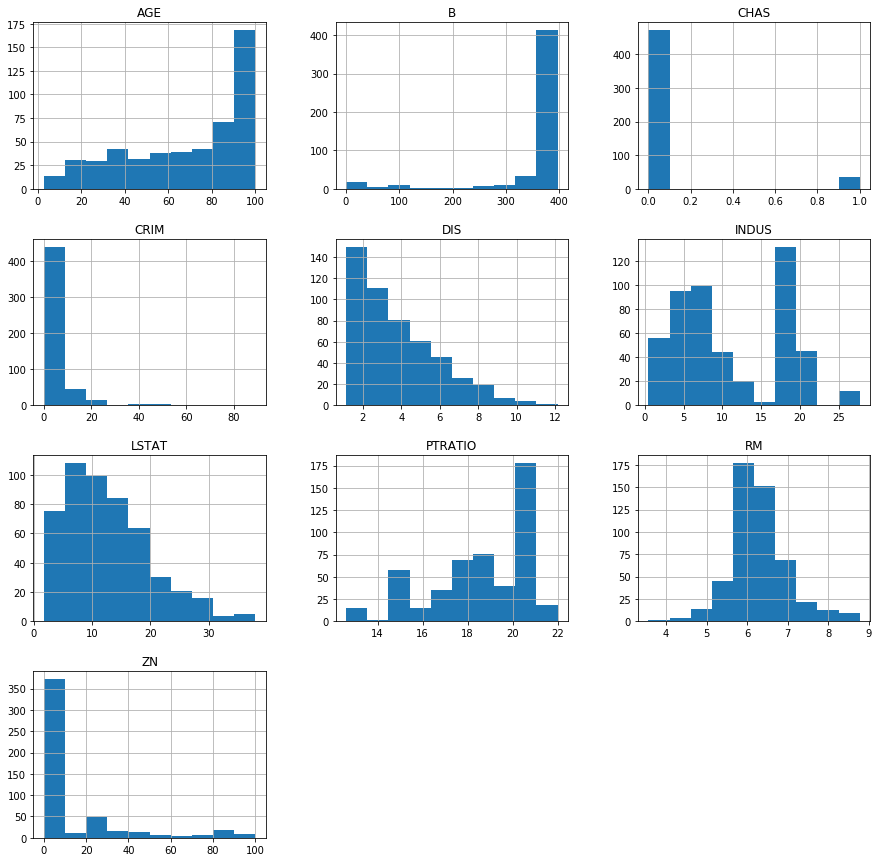

In [13]:
# Your code here
boston_features.head()
plot_features = boston_features.iloc[:,:10]
plot_features.hist(figsize = (15, 15));

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

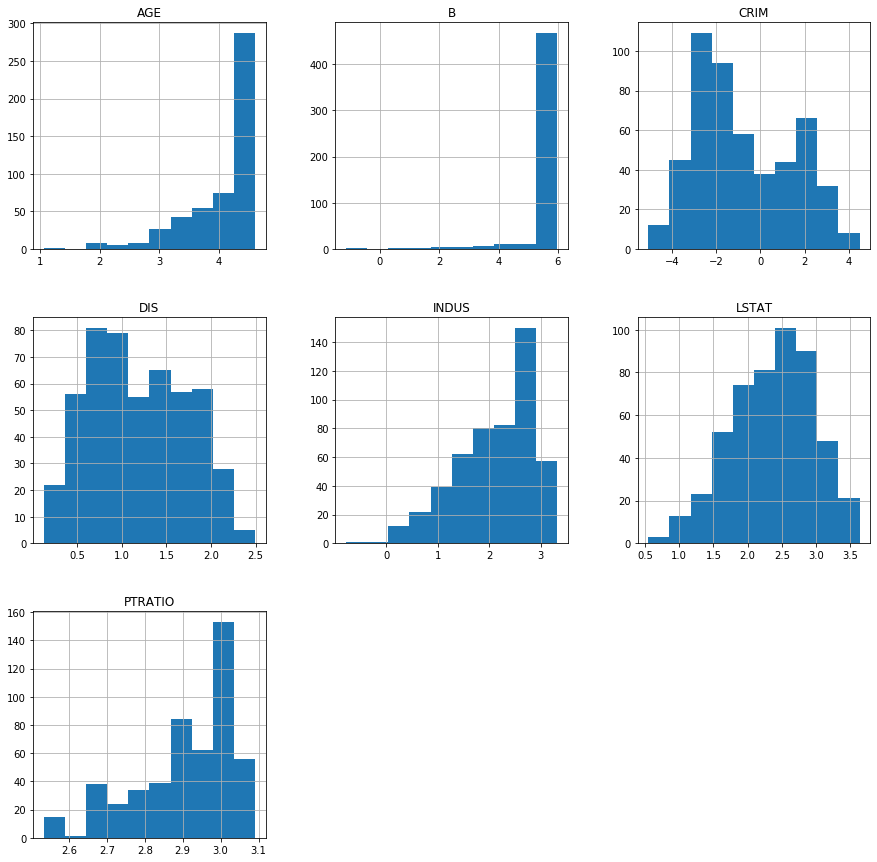

In [16]:
# Your code here

import numpy as np
log = pd.DataFrame([])
log['AGE'] = np.log(plot_features['AGE'])
log['B'] = np.log(plot_features['B'])
log['CRIM'] = np.log(plot_features['CRIM'])
log['DIS'] = np.log(plot_features['DIS'])
log['INDUS'] = np.log(plot_features['INDUS'])
log['LSTAT'] = np.log(plot_features['LSTAT'])
log['PTRATIO'] = np.log(plot_features['PTRATIO'])
log.hist(figsize  = [15, 15]);

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [ ]:
# Your code here


## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

In [ ]:
# Your code here

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!